# 1. Preprocessing

## 1.1 Library, Datasets. and Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from collections import Counter
warnings.filterwarnings('ignore')

In [ ]:
# Detect Outliers
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1 
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col) 
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
def another_plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [ ]:
def one_hot_encoding(train_data,test_data,cols_name) :
    from sklearn.preprocessing import OneHotEncoder
    encoded_features = []
    for df in [train_data, test_data]:
        cnt = 0
        for feature in cols_name:
            encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
            n = df[feature].nunique()
            cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
            encoded_df = pd.DataFrame(encoded_feat, columns=cols)
            encoded_df.index = df.index
            encoded_features.append(encoded_df)
            cnt += 1
    train_X = pd.concat([train_data, *encoded_features[:cnt]], axis=1)
    test_X = pd.concat([test_data, *encoded_features[cnt:]], axis=1)
    return train_X, test_X

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
train = pd.read_csv('trainedit.csv')
train.drop(['age','Unnamed: 22'],axis = 1,inplace = True)
train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Age_New
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0,36
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,0.00,2007,4,4,3,0,0,1,47.68,0.0,0,32
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0,51
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1,54
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,0.00,1985,30,9,8,2,3,0,47.18,0.0,0,56


In [ ]:
test = pd.read_csv('testedit.csv')
test.drop(['age'],axis = 1, inplace = True)
test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Age_New
0,JG04,1.385641,PG03,1.385641,1.526434,RM_type_B,2,Y,0,level_0,4.0,2016,3,2,2,0,6,0,50.68,0,32
1,JG05,2.828427,PG07,2.828427,1.385641,RM_type_A,2,Y,2,level_1,0.0,1986,31,9,8,0,5,0,84.67,2,54
2,JG04,2.549510,PG04,2.828427,0.648074,RM_type_A,1,Y,2,level_1,0.0,1993,25,10,7,0,3,0,46.66,0,46
3,JG05,2.707397,PG07,2.828427,1.555635,RM_type_A,1,Y,2,level_1,0.0,1988,31,9,8,10,4,0,65.12,0,54
4,JG05,2.828427,PG06,2.236068,0.412311,RM_type_A,2,Y,3,level_1,0.0,1994,24,8,6,2,3,2,50.01,0,45


In [ ]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,index,Best Performance
0,0,0.131028
1,1,0.379354
2,2,0.031798
3,3,0.285220
4,4,0.848732


In [ ]:
train_len = len(train)
train_len

11153

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   marital_status_maried(Y/N)             11153 non-null  object 
 8   number_of_dependences                  11153 non-null  int64  
 9   Education_level                        11153 non-null  object 
 10  GPA                                    11153 non-null  float64
 11  ye

In [ ]:
train.shape, test.shape

((11153, 22), (6000, 21))

In [ ]:
mv = train.isna().sum() != 0
mv_train = train.isnull().sum()[mv==True]
mv_train

Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
dtype: int64

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
job_duration_in_current_job_level,11153.0,1.433208,0.431086,0.00,1.224745,1.352775,1.414214,2.958040
job_duration_in_current_person_level,11153.0,1.349218,0.324660,0.00,1.224745,1.352775,1.385641,2.828427
job_duration_in_current_branch,11153.0,1.034646,0.416723,0.00,0.707107,1.118034,1.224745,2.677686
gender,11153.0,1.735587,0.441040,1.00,1.000000,2.000000,2.000000,2.000000
number_of_dependences,11153.0,0.995517,0.881103,0.00,0.000000,1.000000,2.000000,7.000000
GPA,11153.0,3.091263,13.150521,0.00,2.820000,3.070000,3.260000,378.000000
year_graduated,11153.0,2009.174124,4.117162,1982.00,2008.000000,2010.000000,2012.000000,2019.000000
job_duration_from_training,11153.0,6.277952,5.033553,2.00,4.000000,5.000000,6.000000,36.000000
branch_rotation,11153.0,3.720165,2.399068,1.00,2.000000,3.000000,4.000000,22.000000
job_rotation,11153.0,3.505694,1.818028,1.00,2.000000,3.000000,4.000000,15.000000


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
job_duration_in_current_job_level,6000.0,1.433120,0.420971,0.00,1.224745,1.352775,1.414214,2.915476
job_duration_in_current_person_level,6000.0,1.347325,0.316625,0.00,1.224745,1.352775,1.385641,2.828427
job_duration_in_current_branch,6000.0,1.030270,0.413334,0.00,0.707107,1.118034,1.224745,2.738613
gender,6000.0,1.729500,0.444255,1.00,1.000000,2.000000,2.000000,2.000000
number_of_dependences,6000.0,0.985000,0.866930,0.00,0.000000,1.000000,2.000000,4.000000
GPA,6000.0,3.204312,14.505022,0.00,2.820000,3.080000,3.280000,381.000000
year_graduated,6000.0,2009.226000,3.975117,1984.00,2008.000000,2010.000000,2012.000000,2020.000000
job_duration_from_training,6000.0,6.218500,4.871110,2.00,4.000000,5.000000,6.000000,35.000000
branch_rotation,6000.0,3.695333,2.338323,1.00,2.000000,3.000000,4.000000,17.000000
job_rotation,6000.0,3.481500,1.802738,1.00,2.000000,3.000000,4.000000,14.000000


In [ ]:
df = train.append(test).reset_index(drop=True)
df.shape, train.shape, test.shape

((17153, 22), (11153, 22), (6000, 21))

## 1.2 GPA

### 1.2.1 Level 1

In [ ]:
for x,y in zip(df.GPA, df.Education_level) :
    if (y == 'level_1') :
        df['GPA'] = df.GPA.replace(x, 0)
df[df.Education_level == 'level_1'].GPA.value_counts()

0.0    215
Name: GPA, dtype: int64

In [ ]:
df['GPA'] = df.GPA.apply(lambda x : 0.0 if x > 4.0 else x)
df[df['GPA'] > 4.0].GPA.count()

0

### 1.2.2 Level 2

In [ ]:
list2 = []
for i in df[df['Education_level'] == 'level_2'].index:
    if df.iloc[i]['GPA'] == 0.0:
        list2.append(i)
avg2 = 3.20

for x in list2 :
    df[x:x+1]['GPA'] = avg2
df[df.Education_level == 'level_2'].GPA.value_counts()

3.20    3
3.01    2
3.58    1
Name: GPA, dtype: int64

### 1.2.3 Level 3

In [ ]:
list3 = []
for i in df[df['Education_level'] == 'level_3'].index:
    if df.iloc[i]['GPA'] == 0.0:
        list3.append(i)
avg3 = df[df.Education_level == 'level_3'].GPA.median()

for x in list3 :
    df[x:x+1]['GPA'] = avg3
df[df.Education_level == 'level_3'].GPA.value_counts()

3.01    541
3.00     93
3.04     46
3.14     45
2.98     41
2.95     39
3.20     38
3.09     38
2.85     38
3.23     38
3.10     36
3.02     36
3.05     35
3.17     34
3.12     34
3.15     33
3.03     33
3.07     32
2.86     32
3.08     32
2.75     31
2.93     31
2.80     30
3.19     30
3.30     29
2.96     29
3.25     29
3.16     28
3.33     27
2.90     27
2.76     27
2.97     27
3.21     26
3.11     26
3.27     26
2.88     25
2.82     25
2.89     25
3.13     24
2.81     24
3.26     24
2.83     23
3.38     23
2.77     22
2.79     21
3.18     21
2.94     20
3.28     20
2.91     20
3.29     20
3.31     20
2.87     20
3.06     19
2.92     19
3.40     18
3.22     18
3.24     17
2.84     17
2.99     16
3.34     16
3.45     16
3.46     16
2.78     15
3.32     15
3.60     14
3.54     14
3.47     13
3.36     13
3.51     12
3.37     12
3.35     12
3.56     11
3.50     11
3.52     10
3.42     10
3.39     10
3.44     10
2.70      9
3.57      8
3.55      8
3.41      8
3.53      8
3.43      7
3.64

### 1.2.4 Level 4

In [ ]:
list4 = []
for i in df[df['Education_level'] == 'level_4'].index:
    if df.iloc[i]['GPA'] == 0.0:
        list4.append(i)
avg4 = df[df.Education_level == 'level_4'].GPA.median()

for x in list4 :
    df[x:x+1]['GPA'] = avg4
df[df.Education_level == 'level_4'].GPA.value_counts()

3.09    2838
3.00     480
3.01     302
3.10     260
3.03     238
3.05     238
3.14     232
3.20     231
3.25     216
3.11     213
3.15     211
3.21     202
3.07     201
3.08     196
3.13     191
3.12     187
3.19     184
3.23     180
3.06     178
3.16     176
3.02     174
3.22     166
3.30     165
3.17     164
3.18     163
3.24     157
3.28     156
3.26     152
3.04     147
3.34     144
3.31     141
3.27     138
3.40     135
3.29     129
3.32     127
3.35     123
3.33     122
3.41     120
2.98     114
2.90     114
2.97     113
2.99     112
3.36     110
3.37     110
2.95     109
2.85     105
3.38     102
2.89      99
2.75      96
3.43      96
2.93      93
3.39      88
3.42      84
3.51      83
2.92      82
2.91      81
2.80      81
2.88      80
3.52      79
3.45      78
2.86      78
3.44      75
3.50      72
2.84      71
3.49      71
2.76      70
3.53      69
3.46      69
3.48      68
3.47      68
2.83      67
2.81      67
2.87      64
3.54      64
2.96      63
2.94      63
2.82      62

### 1.2.5 Level 5

In [ ]:
list5 = []
for i in df[df['Education_level'] == 'level_5'].index:
    if df.iloc[i]['GPA'] == 0.0:
        list5.append(i)
avg5 = df[df.Education_level == 'level_5'].GPA.median()

for x in list5 :
    df[x:x+1]['GPA'] = avg5
df[df.Education_level == 'level_5'].GPA.value_counts()

3.46    10
3.33     4
3.50     3
3.57     3
3.00     2
3.30     2
3.76     2
3.32     2
3.86     2
3.23     2
3.63     2
3.34     2
3.56     2
3.44     2
3.28     2
3.75     2
3.35     2
3.37     1
3.54     1
3.62     1
3.66     1
3.48     1
3.58     1
3.47     1
3.19     1
3.51     1
3.10     1
3.83     1
3.73     1
3.69     1
3.27     1
3.14     1
3.84     1
3.80     1
3.49     1
3.55     1
3.77     1
3.43     1
3.64     1
3.53     1
3.60     1
2.97     1
Name: GPA, dtype: int64

In [ ]:
train = df[:train_len]
test = df[train_len:]
df.shape, train.shape, test.shape

((17153, 22), (11153, 22), (6000, 22))

In [ ]:
test.drop('Best Performance',axis=1, inplace=True)

## 1.3 Outliers

In [ ]:
cols_num = []
for col in test.columns :
    if train[col].dtypes != 'object' :
        cols_num.append(col)
cols_num

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'gender',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'sick_leaves',
 'Last_achievement_%',
 'Achievement_above_100%_during3quartal',
 'Age_New']

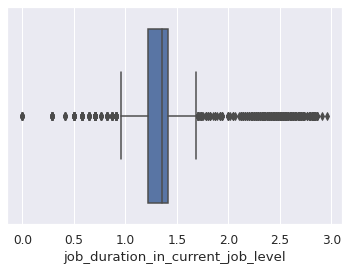

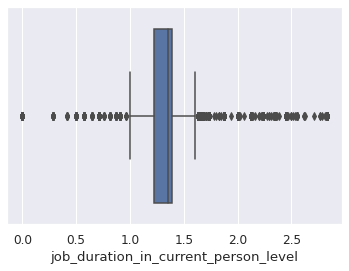

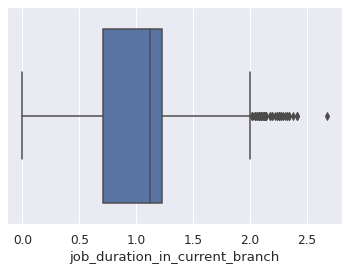

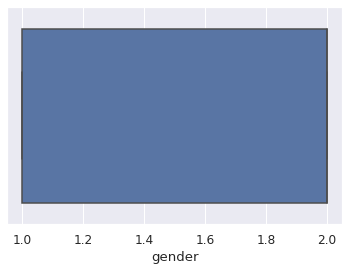

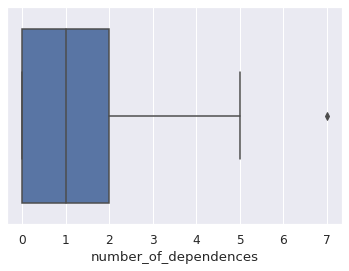

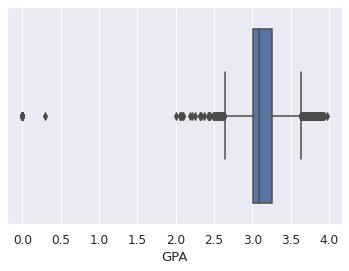

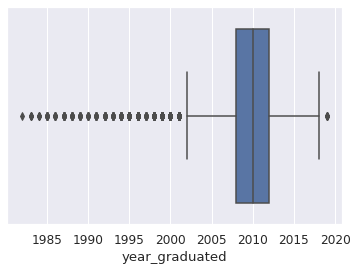

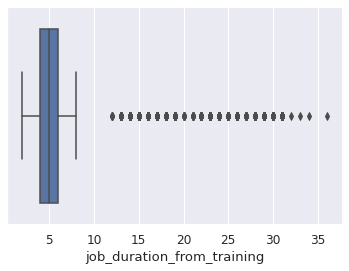

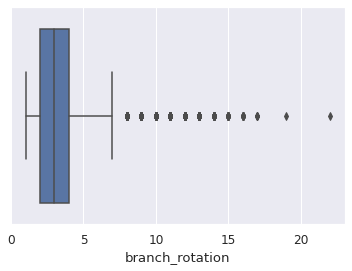

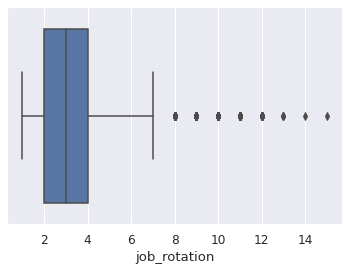

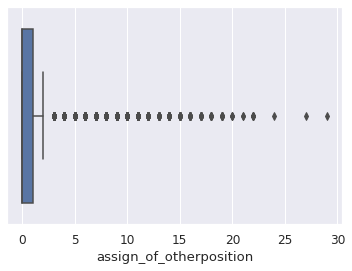

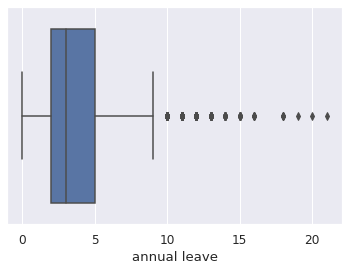

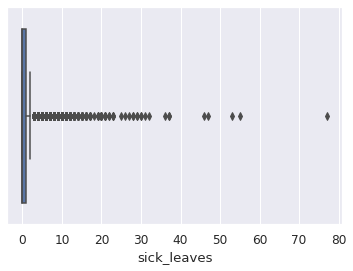

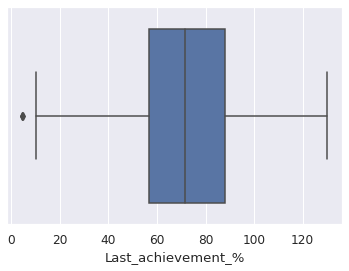

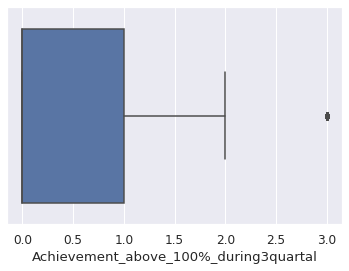

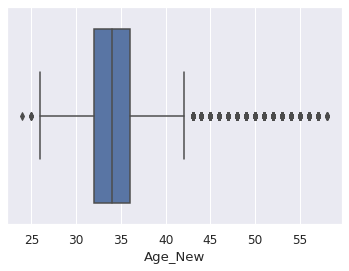

In [ ]:
for col in cols_num :
    sns.boxplot(x=col, data=train)
    plt.show()

In [ ]:
Outliers_to_drop = detect_outliers(train,2,[cols_num])

In [ ]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
train.shape

(11153, 22)

## 1.4 Missing Value

In [ ]:
train['Achievement_above_100%_during3quartal'] = train['Achievement_above_100%_during3quartal'].fillna(
                                                 train['Achievement_above_100%_during3quartal'].median())

In [ ]:
train['Last_achievement_%'] = train['Last_achievement_%'].fillna(train['Last_achievement_%'].median())

# 2. EDA

In [ ]:
kontinu = ['job_duration_in_current_job_level','GPA','job_duration_in_current_person_level',
           'job_duration_in_current_branch','job_duration_from_training','Age_New','Last_achievement_%',
           'Achievement_above_100%_during3quartal']
diskret = ['job_level','person_level','Employee_type','gender','marital_status_maried(Y/N)',
           'number_of_dependences','Education_level','annual leave','sick_leaves','year_graduated','branch_rotation',
           'job_rotation','assign_of_otherposition']

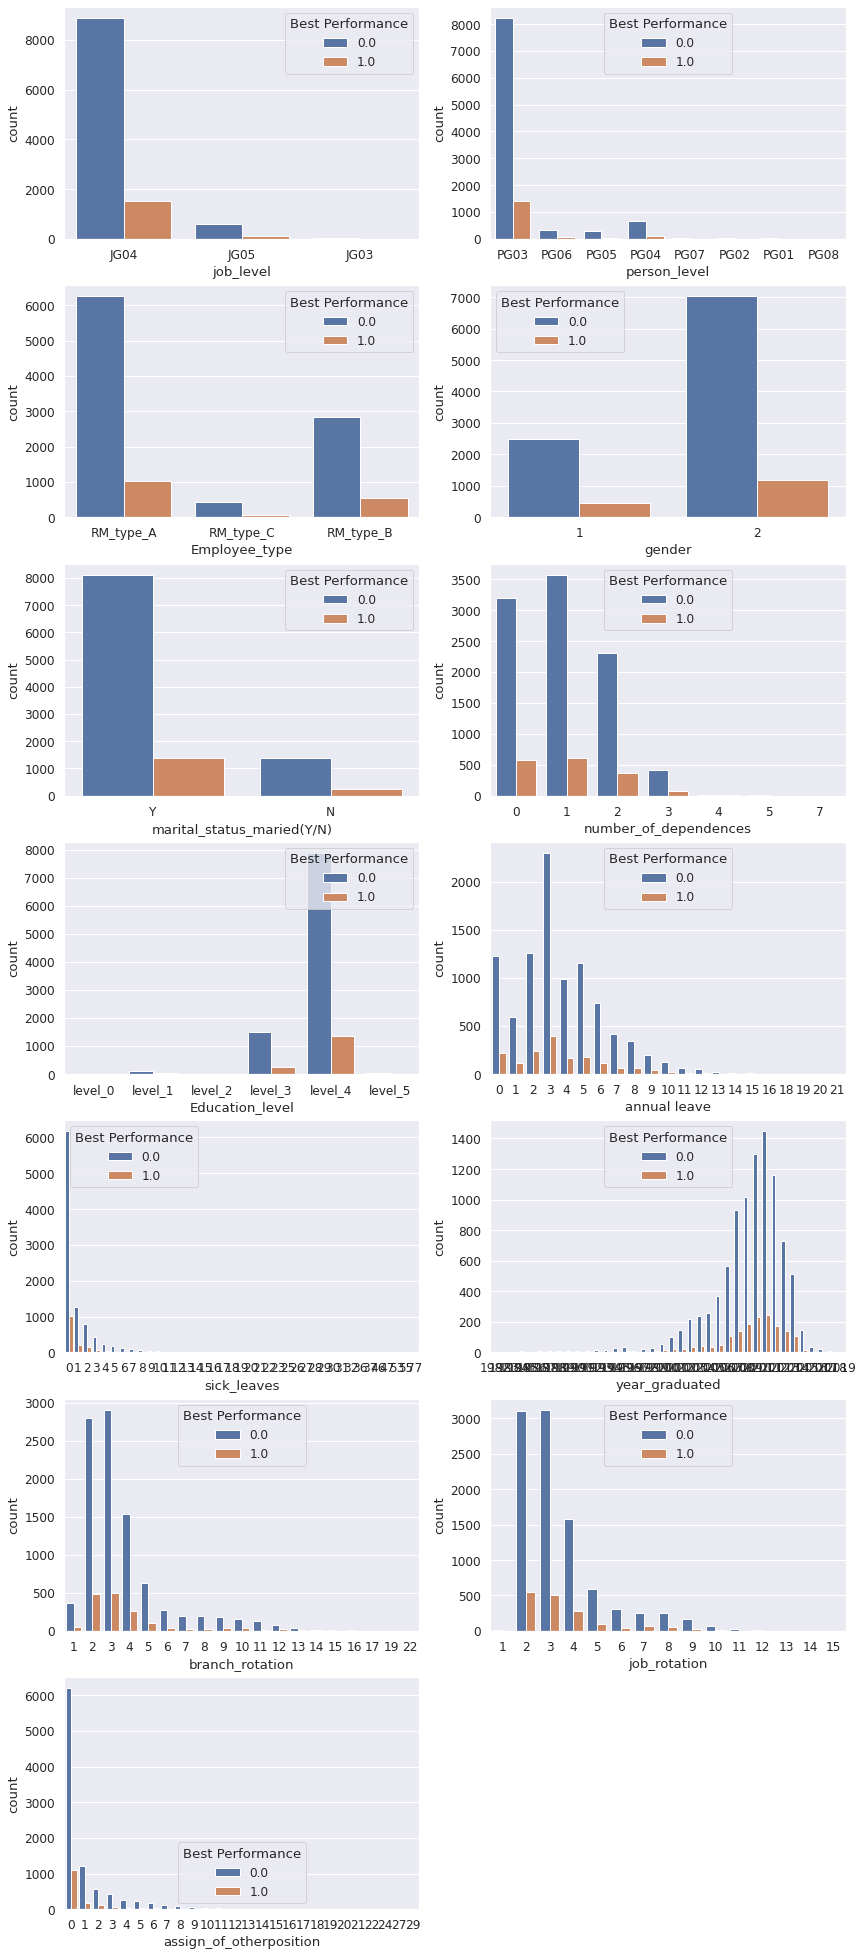

In [ ]:
figure = plt.figure(figsize=(14,35))
i = 1 
for col in diskret:
    figure.add_subplot(7,2,i)
    sns.countplot(x = col, data = train, hue = 'Best Performance')
    i+=1

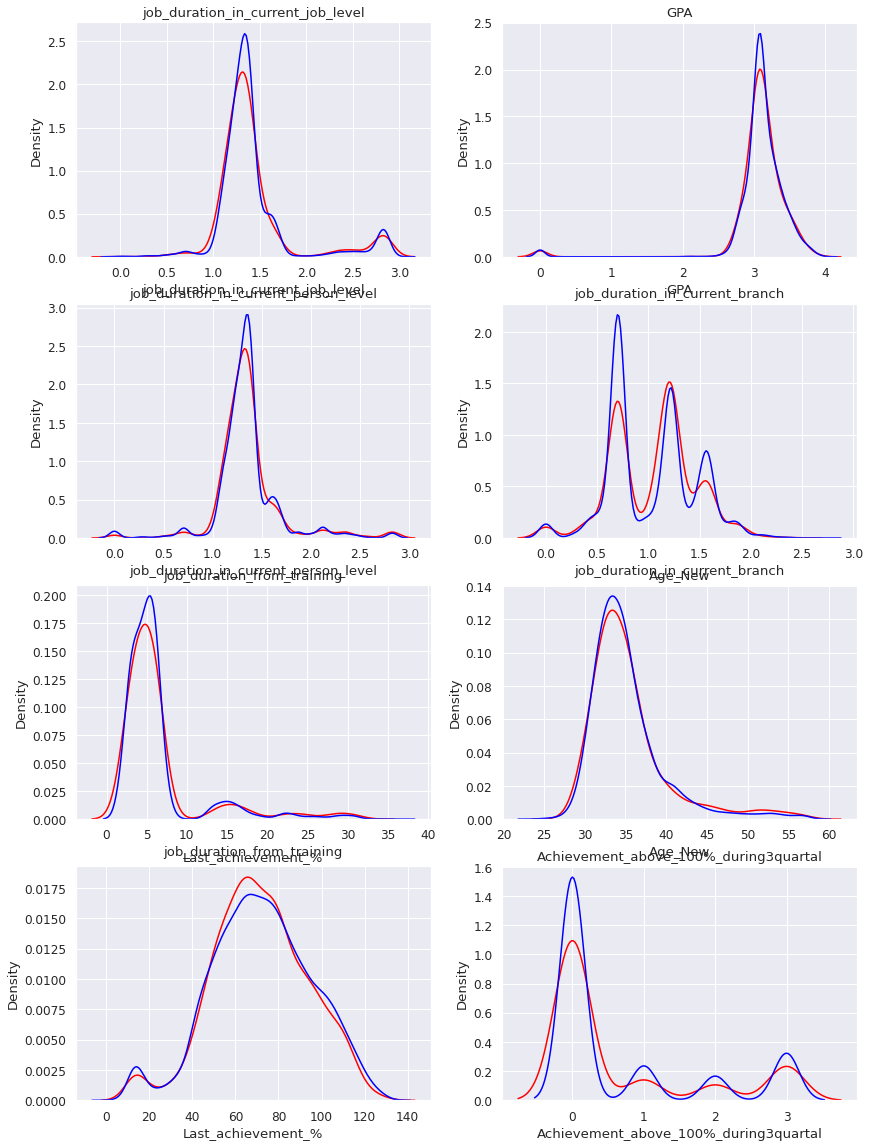

In [ ]:
figure = plt.figure(figsize=(14,25))
i = 1 
one = train['Best Performance'] == 1
for col in kontinu:
    figure.add_subplot(5,2,i)
    sns.kdeplot(data = train[one][col], label='Best', color='red')
    sns.kdeplot(data = train[~one][col], label='Not Best', color='blue')
    plt.title(col)
    i+=1

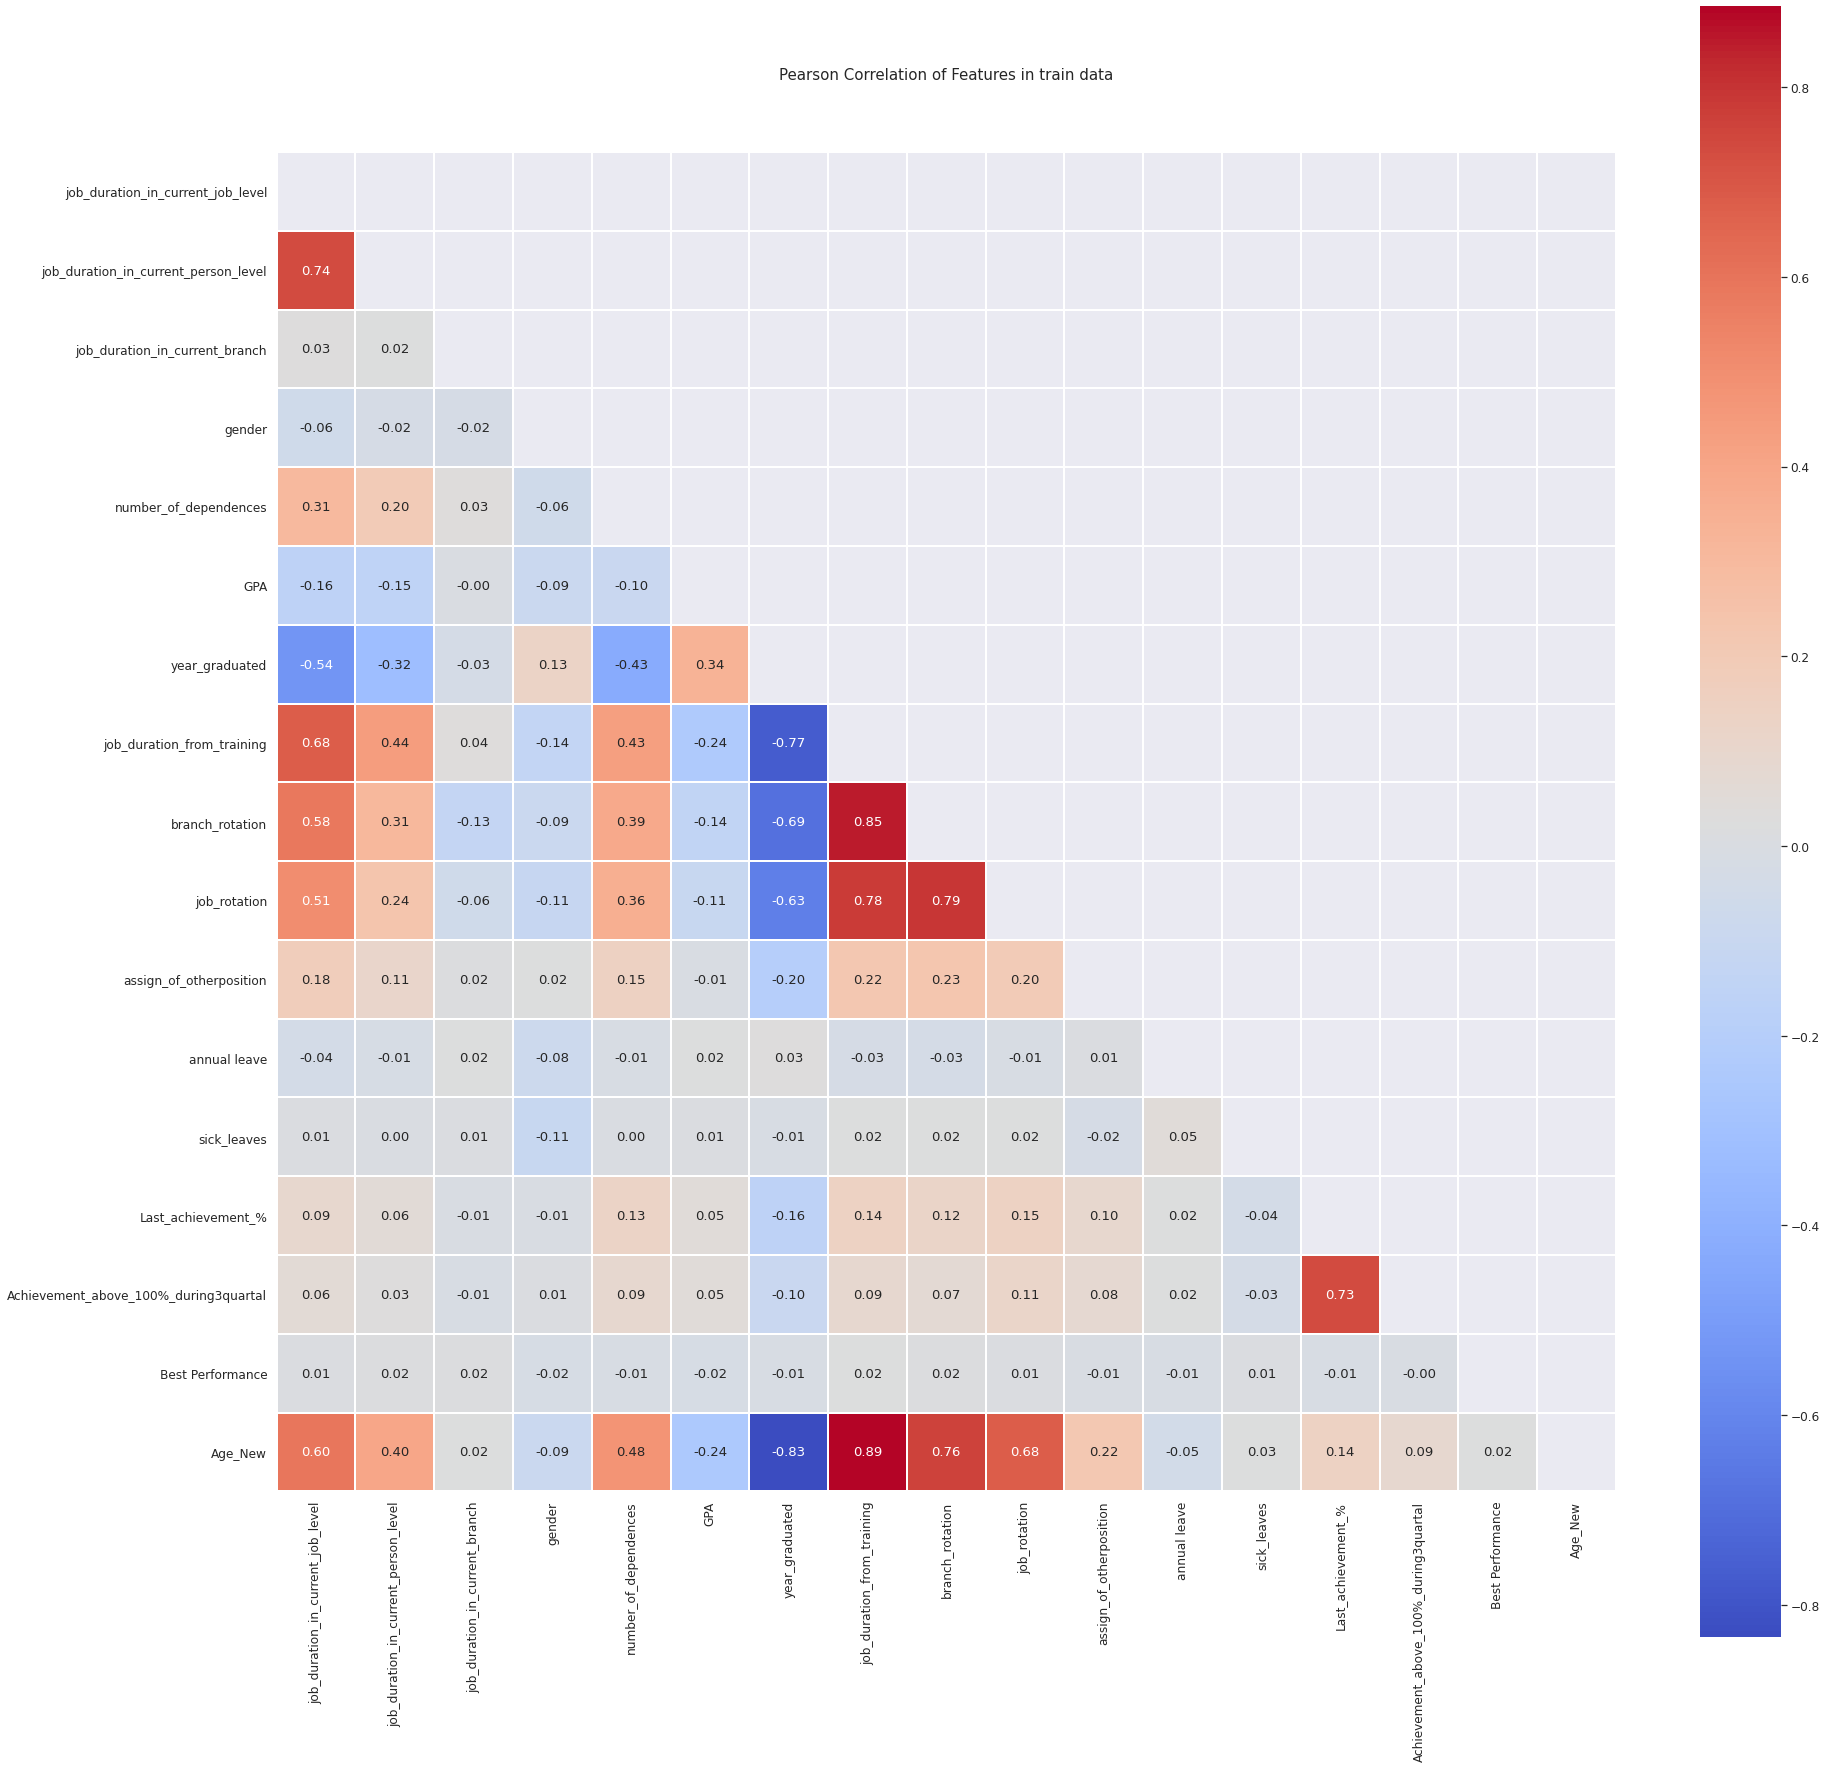

In [ ]:
plt.figure(figsize=(30,30))
sns.set(font_scale=1.1)
plt.title('Pearson Correlation of Features in train data', y=1.05, size=15)
corr_train = train.corr()
mask = np.triu(corr_train.corr())
sns.heatmap(corr_train, square=True, linecolor='white', 
            annot=True, cmap='coolwarm', fmt='.2f', mask=mask,
            linewidths=1)

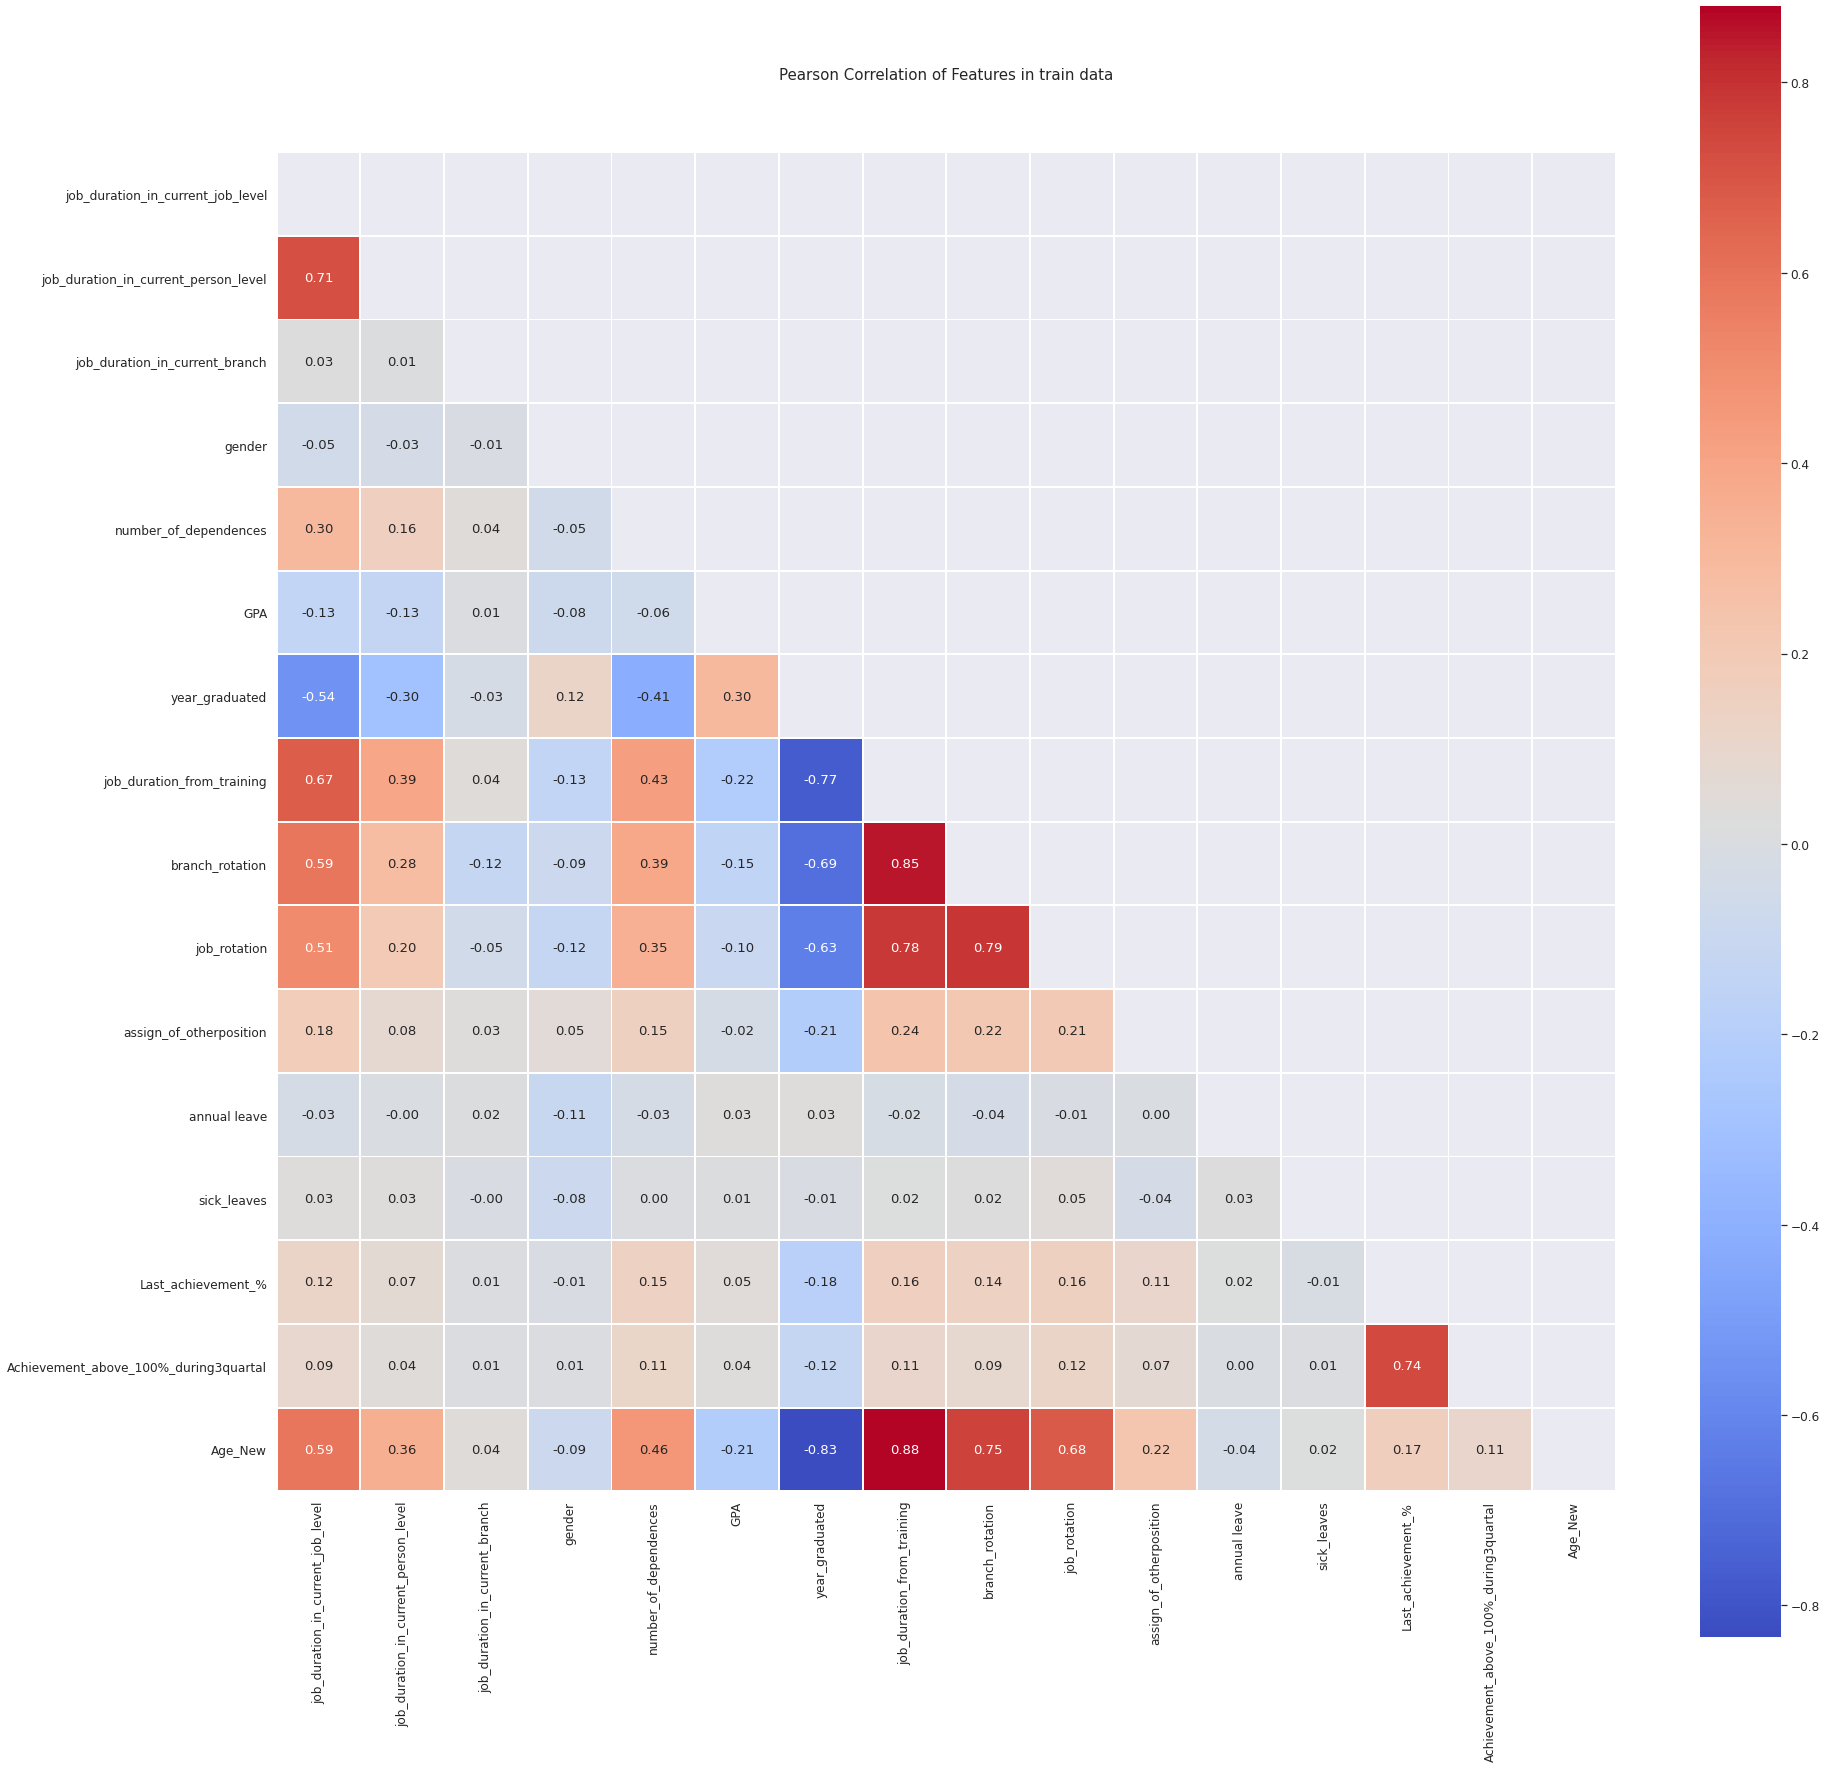

In [ ]:
plt.figure(figsize=(30,30))
sns.set(font_scale=1.1)
plt.title('Pearson Correlation of Features in train data', y=1.05, size=15)
corr_train = test.corr()
mask = np.triu(corr_train.corr())
sns.heatmap(corr_train, square=True, linecolor='white', 
            annot=True, cmap='coolwarm', fmt='.2f', mask=mask,
            linewidths=1)
plt.show()

# 3. Feature Engineering

In [ ]:
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [ ]:
df = train.append(test)
df.isna().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                               0
gender                                      0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
Education_level                             0
GPA                                         0
year_graduated                              0
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                                 0
Last_achievement_%                          0
Achievement_above_100%_during3quartal       0
Best Performance                         6000
Age_New                           

## 3.1 Feature Generation

### 3.1.1 Assign of Other Position

In [ ]:
df['has_assign_of_otherposition'] = df['assign_of_otherposition'].apply(lambda x : 'yes' if x != 0
                                                                     else 'no')
df['has_assign_of_otherposition'].unique()

array(['yes', 'no'], dtype=object)

### 3.1.2 Number of Dependences

In [ ]:
df['number_of_dependences'].value_counts()

1    6482
0    5807
2    4095
3     742
4      22
5       4
7       1
Name: number_of_dependences, dtype: int64

In [ ]:
df['number_of_dependences'] = df['number_of_dependences'].apply(lambda x : 'none' if x == 0 else x)
df['number_of_dependences'] = df['number_of_dependences'].apply(lambda x : '1' if x == 1 else x)
df['number_of_dependences'] = df['number_of_dependences'].apply(lambda x : '2' if x == 2 else x)
df['number_of_dependences'] = df['number_of_dependences'].apply(lambda x : '3' if x == 3 else x)
df['number_of_dependences'] = df['number_of_dependences'].apply(lambda x : '> 3' if type(x) != str else x)

In [ ]:
df['number_of_dependences'].unique()

array(['1', 'none', '2', '3', '> 3'], dtype=object)

### 3.1.3 Sick Leaves

In [ ]:
df['has_sick_leaves'] = df['sick_leaves'].apply(lambda x : 'yes' if x != 0 else 'no')

In [ ]:
df['has_sick_leaves'].unique()

array(['no', 'yes'], dtype=object)

## 3.2 Feature Encoding

In [ ]:
obj = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj.append(i)
obj

['job_level',
 'person_level',
 'Employee_type',
 'marital_status_maried(Y/N)',
 'number_of_dependences',
 'Education_level',
 'has_assign_of_otherposition',
 'has_sick_leaves']

### 3.2.1 Label Encoding

In [ ]:
obj_le = ['Education_level', 'job_level', 'person_level']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in obj_le :
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Age_New,has_assign_of_otherposition,has_sick_leaves
0,1,1.352775,2,1.352775,1.732051,RM_type_A,2,Y,1,0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0.0,36,yes,no
1,1,1.292285,2,1.292285,1.039230,RM_type_A,2,Y,none,1,0.00,2007,4,4,3,0,0,1,47.68,0.0,0.0,32,no,yes
2,2,2.565151,5,2.308679,1.780449,RM_type_C,1,Y,1,1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0.0,51,yes,yes
3,2,2.828427,5,1.000000,1.385641,RM_type_A,2,Y,2,1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1.0,54,no,yes
4,2,2.828427,5,2.828427,0.707107,RM_type_A,2,Y,3,1,0.00,1985,30,9,8,2,3,0,47.18,0.0,0.0,56,yes,no


### 3.2.2 One Hot Encoding

In [ ]:
train = df.iloc[:11153,:]
test = df.iloc[11153:,:]

In [ ]:
train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Age_New,has_assign_of_otherposition,has_sick_leaves
0,1,1.352775,2,1.352775,1.732051,RM_type_A,2,Y,1,0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0.0,36,yes,no
1,1,1.292285,2,1.292285,1.039230,RM_type_A,2,Y,none,1,0.00,2007,4,4,3,0,0,1,47.68,0.0,0.0,32,no,yes
2,2,2.565151,5,2.308679,1.780449,RM_type_C,1,Y,1,1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0.0,51,yes,yes
3,2,2.828427,5,1.000000,1.385641,RM_type_A,2,Y,2,1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1.0,54,no,yes
4,2,2.828427,5,2.828427,0.707107,RM_type_A,2,Y,3,1,0.00,1985,30,9,8,2,3,0,47.18,0.0,0.0,56,yes,no


In [ ]:
obj_onehot = ['Employee_type', 'marital_status_maried(Y/N)', 'number_of_dependences']
train, test = one_hot_encoding(train, test, obj_onehot)

In [ ]:
y = train['Best Performance']
train.drop(['Best Performance', 'Employee_type', 'marital_status_maried(Y/N)', 'number_of_dependences'], 
           axis = 1, inplace = True)
test.drop(obj_onehot, axis = 1, inplace = True)

In [ ]:
test.drop(['Best Performance'], axis = 1, inplace = True)

In [ ]:
train.shape, test.shape

((11153, 30), (6000, 30))

In [ ]:
train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Age_New,has_assign_of_otherposition,has_sick_leaves,Employee_type_1,Employee_type_2,Employee_type_3,marital_status_maried(Y/N)_1,marital_status_maried(Y/N)_2,number_of_dependences_1,number_of_dependences_2,number_of_dependences_3,number_of_dependences_4,number_of_dependences_5
0,1,1.352775,2,1.352775,1.732051,2,0,2.86,2011,4,2,3,2,3,0,46.37,0.0,36,yes,no,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,1.292285,2,1.292285,1.039230,2,1,0.00,2007,4,4,3,0,0,1,47.68,0.0,32,no,yes,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,2.565151,5,2.308679,1.780449,1,1,0.00,1989,28,10,9,6,2,1,40.73,0.0,51,yes,yes,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2,2.828427,5,1.000000,1.385641,2,1,0.00,1987,29,11,6,0,4,10,47.42,0.0,54,no,yes,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2,2.828427,5,2.828427,0.707107,2,1,0.00,1985,30,9,8,2,3,0,47.18,0.0,56,yes,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### 3.2.3 Binary Feature Mapping

In [ ]:
obj_bin = ['has_assign_of_otherposition','has_sick_leaves']

In [ ]:
for data in [train,test] :
    data['has_assign_of_otherposition'] = data['has_assign_of_otherposition'].map({'no' : 0, 
                                                                           'yes' : 1})
    data['has_sick_leaves'] = data['has_sick_leaves'].map({'yes' : 1, 'no' : 0})

In [ ]:
train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Age_New,has_assign_of_otherposition,has_sick_leaves,Employee_type_1,Employee_type_2,Employee_type_3,marital_status_maried(Y/N)_1,marital_status_maried(Y/N)_2,number_of_dependences_1,number_of_dependences_2,number_of_dependences_3,number_of_dependences_4,number_of_dependences_5
0,1,1.352775,2,1.352775,1.732051,2,0,2.86,2011,4,2,3,2,3,0,46.37,0.0,36,1,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,1.292285,2,1.292285,1.039230,2,1,0.00,2007,4,4,3,0,0,1,47.68,0.0,32,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,2.565151,5,2.308679,1.780449,1,1,0.00,1989,28,10,9,6,2,1,40.73,0.0,51,1,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2,2.828427,5,1.000000,1.385641,2,1,0.00,1987,29,11,6,0,4,10,47.42,0.0,54,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2,2.828427,5,2.828427,0.707107,2,1,0.00,1985,30,9,8,2,3,0,47.18,0.0,56,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train_cols = train.columns

# 3.3 Feature Transformation 

### 3.3.1 Treat Imbalance Dataset

In [ ]:
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
counter = Counter(y)
print(counter)
# transform the dataset
under = RandomUnderSampler(sampling_strategy=0.23, random_state=42)
train, y = under.fit_resample(train, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0.0: 9516, 1.0: 1637})
Counter({0.0: 7117, 1.0: 1637})


In [ ]:
counter = Counter(y)
print(counter)
# transform the dataset
over = BorderlineSMOTE(sampling_strategy=0.45, random_state=42)
train,y = over.fit_resample(train,y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0.0: 7117, 1.0: 1637})
Counter({0.0: 7117, 1.0: 3202})


### 3.3.2

In [ ]:
train = pd.DataFrame(data=train, columns=train_cols)
train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Age_New,has_assign_of_otherposition,has_sick_leaves,Employee_type_1,Employee_type_2,Employee_type_3,marital_status_maried(Y/N)_1,marital_status_maried(Y/N)_2,number_of_dependences_1,number_of_dependences_2,number_of_dependences_3,number_of_dependences_4,number_of_dependences_5
0,1,1.352775,2,1.352775,1.732051,2,0,2.86,2011,4,2,3,2,3,0,46.37,0.0,36,1,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,1.292285,2,1.292285,1.039230,2,1,0.00,2007,4,4,3,0,0,1,47.68,0.0,32,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,2.565151,5,2.308679,1.780449,1,1,0.00,1989,28,10,9,6,2,1,40.73,0.0,51,1,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2,2.828427,5,1.000000,1.385641,2,1,0.00,1987,29,11,6,0,4,10,47.42,0.0,54,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2,2.828427,5,2.828427,0.707107,2,1,0.00,1985,30,9,8,2,3,0,47.18,0.0,56,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train = train.reset_index(drop=True)
train.head(2)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Age_New,has_assign_of_otherposition,has_sick_leaves,Employee_type_1,Employee_type_2,Employee_type_3,marital_status_maried(Y/N)_1,marital_status_maried(Y/N)_2,number_of_dependences_1,number_of_dependences_2,number_of_dependences_3,number_of_dependences_4,number_of_dependences_5
0,1,1.352775,2,1.352775,1.732051,2,0,2.86,2011,4,2,3,2,3,0,46.37,0.0,36,1,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,1.292285,2,1.292285,1.039230,2,1,0.00,2007,4,4,3,0,0,1,47.68,0.0,32,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
train['interval_graduated'] = 2021 - train['year_graduated']
test['interval_graduated'] = 2021 - test['year_graduated']
train.drop('year_graduated',axis=1,inplace=True)
test.drop('year_graduated',axis=1,inplace=True)
train.shape, test.shape

((11153, 30), (6000, 30))

In [ ]:
train_len = len(train)
df = train.append(test).reset_index(drop=True)
df.shape, train_len

((17153, 30), 11153)

In [ ]:
list_var = []
cols = []
for col in df.columns :
    var = df[col].var()
    if var > 5 :
        list_var.append(var)
        cols.append(col)
data_var = pd.DataFrame({'Column name':cols, 'Variance':list_var})
data_var.T

,0,1,2,3,4,5,6,7
Column name,job_duration_from_training,branch_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Age_New,interval_graduated
Variance,24.7732,5.65468,6.50696,7.02292,8.91667,525.205,20.8314,16.5486


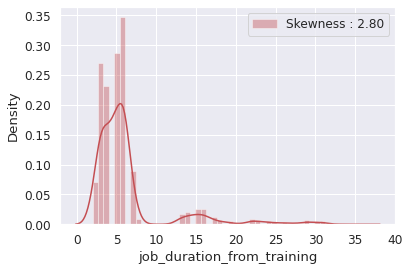

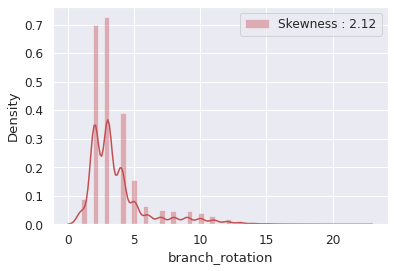

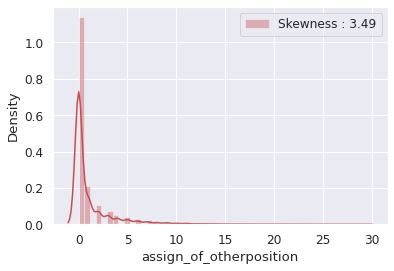

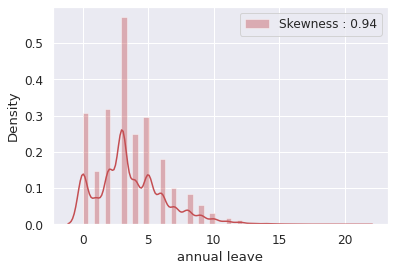

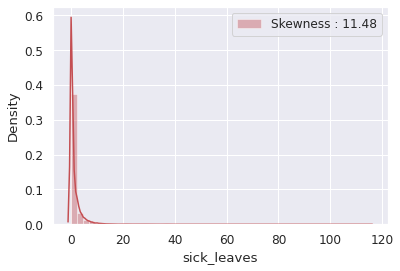

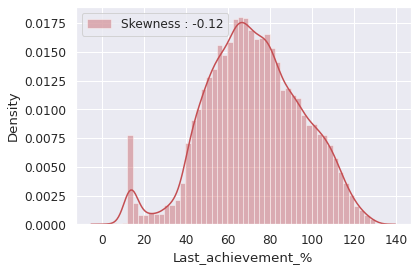

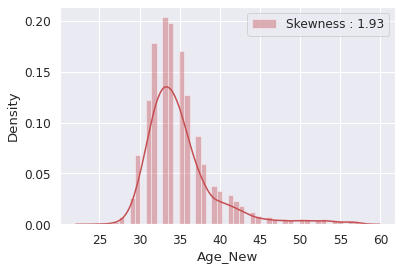

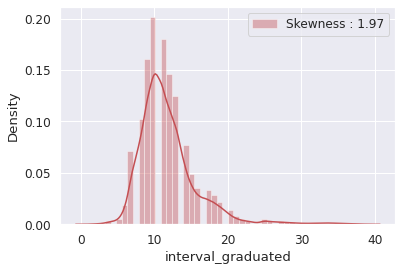

In [ ]:
for i in cols :
    g = sns.distplot(df[i], kde=True, color="r", label="Skewness : %.2f"%(df[i].skew()))
    g = g.legend(loc="best")
    plt.show()

In [ ]:
cols.remove('Last_achievement_%')

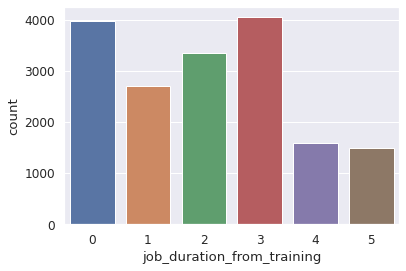

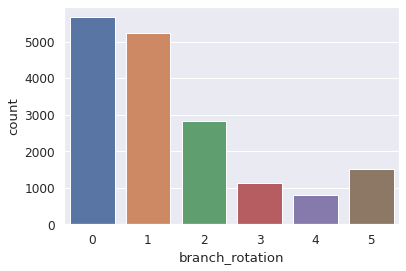

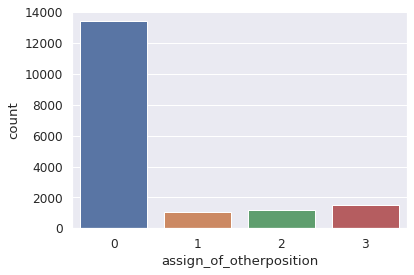

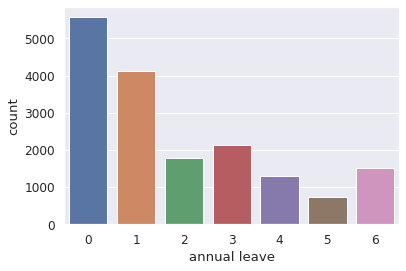

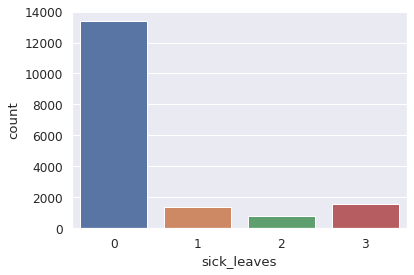

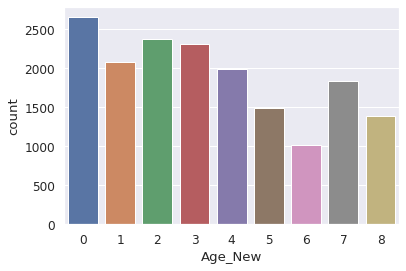

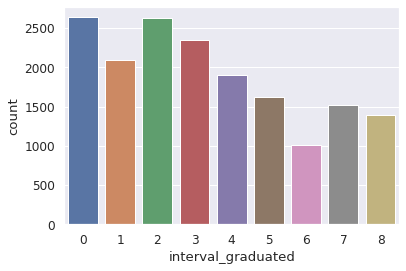

In [ ]:
for i in cols :
    df[i] = pd.qcut(df[i], labels=False, q=10, duplicates='drop')
    sns.countplot(x=i, data=df)
    plt.show()

In [ ]:
train = df.iloc[:train_len]
test = df.iloc[train_len:]
train.shape, test.shape, y.shape

((11153, 30), (6000, 30), (11153,))

## 3.4 Feature Selection

Berdasarkan hasil percobaan dari berbagai kernel yg dipakai & n_components yg digunakan, maka disimpulkan Kernel PCA = 'rbf' & n_components = 20

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=20, kernel='rbf')
train = transformer.fit_transform(train)
test = transformer.transform(test)
train.shape, test.shape, y.shape

((11153, 20), (6000, 20), (11153,))

# 4. Modelling

In [ ]:
pip install optuna

     |████████████████████████████████| 296kB 6.6MB/s 
     |████████████████████████████████| 1.2MB 9.1MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 481kB 1.4MB/s 
     |████████████████████████████████| 112kB 28.8MB/s 
     |████████████████████████████████| 143kB 27.2MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
  Created wheel for alembic: filename=alembic-1.5.5-py2.py3-none-any.whl size=156597 sha256=9dc23fc54b84cee9d7945f094650aa0c32aecedaec7ea0706682b31dce48e99e
  Stored in directory: /root/.cache/pip/wheels/74/3f/61/7de6e3cef766d2680a5d81b1a388286e640f6a681eb589d643
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75675 sha256=0f98229c6d35764a58f7d7b03d4caf87344af1dffc7d8c5479fed63aa5241f9f
  Stored in directory: /root/.cache/pip/wheels/ad/10/d3/aeb26e20d19045e2a68e5d3cbb57432e11b5d9c92c99f98d47
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=ba

## 4.1 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import auc, roc_auc_score, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.3, random_state=0)
kfold_ada = KFold(n_splits=10, shuffle=True, random_state=1234)
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
accuracies = cross_val_score(estimator = ada, X = X_train, y = y_train, cv = kfold_ada)
Accuracy = accuracies.mean()
Standard_Deviation = accuracies.std()
cm_ada = confusion_matrix(y_val, ada.predict(X_val))
score_ada = roc_auc_score(y_val, ada.predict(X_val))
print(cm_ada)
print(score_ada)

[[2023   65]
 [ 942   66]]
0.5171729611384784


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

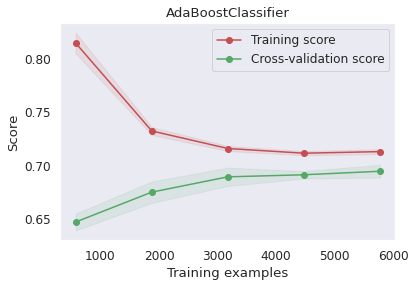

In [ ]:
plot_learning_curve(ada, "AdaBoostClassifier", X_train, y_train)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

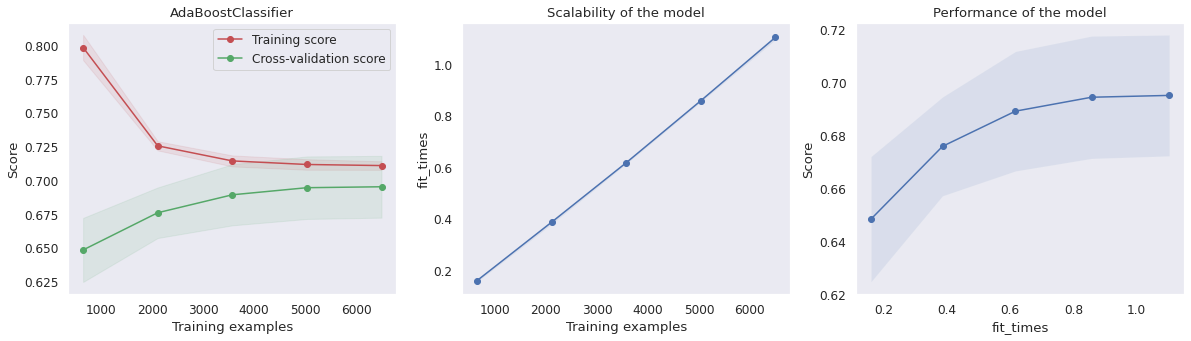

In [ ]:
another_plot_learning_curve(ada, "AdaBoostClassifier", X_train, y_train, cv = kfold_ada)

## 4.1.1 Hyperparameter Tuning

In [ ]:
import optuna
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.ensemble import AdaBoostClassifier

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators" , 100, 1000)
    learning_rate = trial.suggest_float("learning_rate" , 0.001, 1)
    ada_opt = AdaBoostClassifier(n_estimators = n_estimators, learning_rate = learning_rate)
    ada_opt.fit(X_train, y_train)
    y_pred_opt = ada_opt.predict(X_val)
    return roc_auc_score(y_pred_opt, y_val)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2021-02-25 04:42:53,274] A new study created in memory with name: no-name-1b441bac-32f9-4bf2-b5fd-37ad3b192d81
[I 2021-02-25 04:43:09,322] Trial 0 finished with value: 0.5766325041010127 and parameters: {'n_estimators': 637, 'learning_rate': 0.49197774053958726}. Best is trial 0 with value: 0.5766325041010127.
[I 2021-02-25 04:43:18,417] Trial 1 finished with value: 0.5955094685447166 and parameters: {'n_estimators': 361, 'learning_rate': 0.6058868915759708}. Best is trial 1 with value: 0.5955094685447166.
[I 2021-02-25 04:43:43,419] Trial 2 finished with value: 0.6085165470955798 and parameters: {'n_estimators': 991, 'learning_rate': 0.13958100330438988}. Best is trial 2 with value: 0.6085165470955798.
[I 2021-02-25 04:43:50,407] Trial 3 finished with value: 0.6026545550754036 and parameters: {'n_estimators': 278, 'learning_rate': 0.5330492973964882}. Best is trial 2 with value: 0.6085165470955798.
[I 2021-02-25 04:44:15,224] Trial 4 finished with value: 0.6056209477134396 and para

Trial 1 finished with value: 0.6370923161967939 and parameters: {'n_estimators': 303, 'learning_rate': 0.12600845576630113}. Best is trial 1 with value: 0.6370923161967939.

Trial 3 finished with value: 0.6425025159342503 and parameters: {'n_estimators': 500, 'learning_rate': 0.11989079043869066}. Best is trial 3 with value: 0.6425025159342503.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import auc, roc_auc_score, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.3, random_state=0)
kfold_ada_final = KFold(n_splits=10, shuffle=True, random_state=1234)
ada_opt_final = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.11989079043869066)
ada_opt_final.fit(X_train, y_train)
accuracies = cross_val_score(estimator = ada_opt_final, X = X_train, y = y_train, cv = kfold_ada_final)
Accuracy = accuracies.mean()
Standard_Deviation = accuracies.std()
cm_ada_opt_final = confusion_matrix(y_val, ada_opt_final.predict(X_val))
score_ada_opt_final = roc_auc_score(y_val, ada_opt_final.predict(X_val))
print(cm_ada_opt_final)
print(score_ada_opt_final)

[[2059   29]
 [ 967   41]]
0.5133928571428572


[[2040   48]
 [ 940   68]]
0.5222359058565955

[[2005   83]
 [ 924   84]]
0.5217911877394635 n = 870 lr = 0.30233947724431515 (Imbalance Treated)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

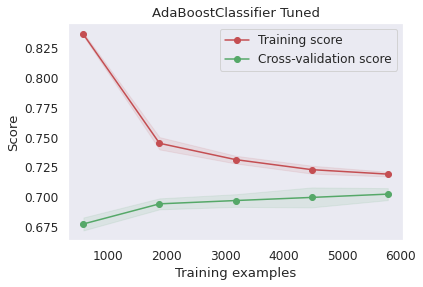

In [ ]:
plot_learning_curve(ada_opt_final, "AdaBoostClassifier Tuned", X_train, y_train)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

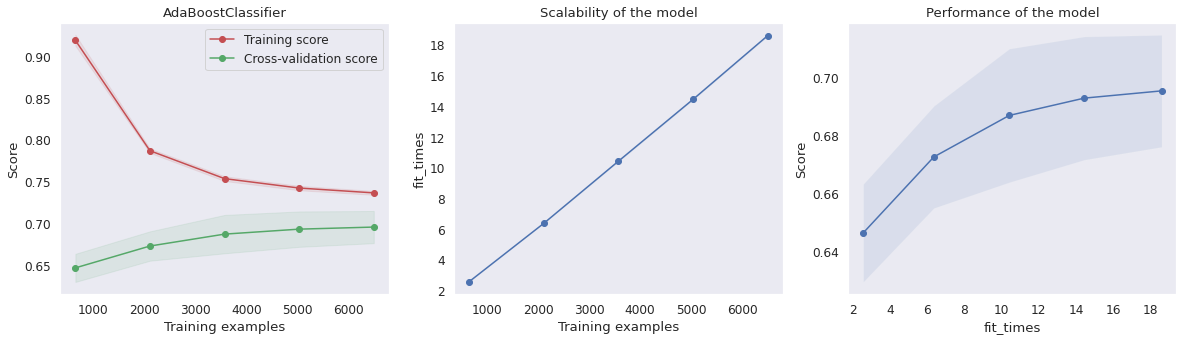

In [ ]:
another_plot_learning_curve(ada_opt_final, "AdaBoostClassifier", X_train, y_train, cv = kfold_ada_final)

### 4.1.2 Submission

In [ ]:
yhat_ada = ada_opt_final.predict_proba(test)[:,1]
ide = sample['index']
submission_ada = pd.Series(yhat_ada, name = 'Best Performance')
submission_ada = pd.concat([ide, submission_ada], axis = 1).reset_index(drop = True)
submission_ada.head()

,index,Best Performance
0,0,0.498909
1,1,0.498615
2,2,0.498668
3,3,0.499157
4,4,0.498768


In [ ]:
submission_ada.to_csv("Submission_AdaBoostClassifier_MMH.csv", index = False)

## 4.2 MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import auc, roc_auc_score, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.3, random_state=0)
kfold_mlp = KFold(n_splits=10, shuffle=True, random_state=1234)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
accuracies = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = kfold_mlp)
Accuracy = accuracies.mean()
Standard_Deviation = accuracies.std()
cm_mlp = confusion_matrix(y_val, mlp.predict(X_val))
score_mlp = roc_auc_score(y_val, mlp.predict(X_val))
print(cm_mlp)
print(score_mlp)

[[2871    0]
 [ 475    0]]
0.5


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

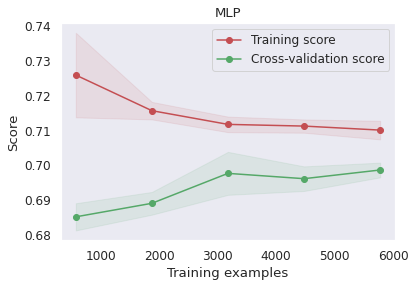

In [ ]:
plot_learning_curve(mlp, "MLP", X_train, y_train)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

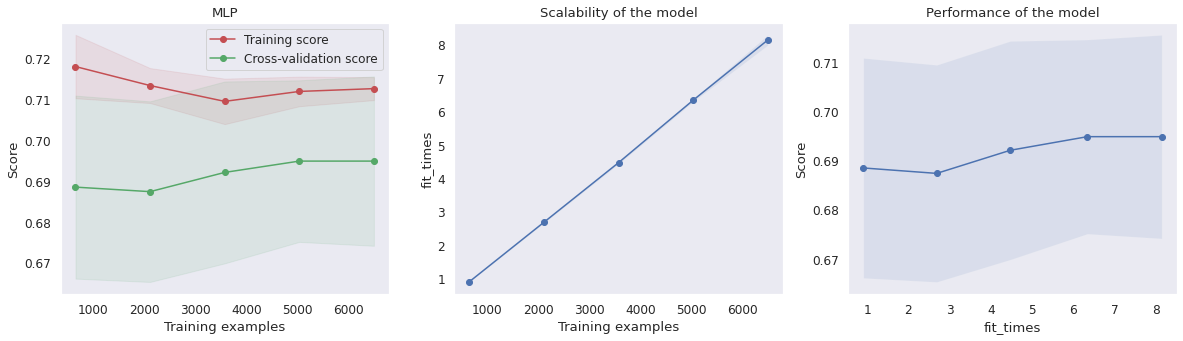

In [ ]:
another_plot_learning_curve(mlp, "MLP", X_train, y_train, cv = kfold_mlp)

## 4.2.1 MLP with Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size = 0.1, random_state = 0)
model = Sequential()
model.add(Dense(16, input_dim=25, activation= 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                416       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 633
Trainable params: 633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
146/146 [==============================] - 1s 1ms/step - loss: 0.6528 - accuracy: 0.6767
Epoch 2/100
146/146 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.6918
Epoch 3/100
146/146 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.6841
Epoch 4/100
146/146 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.7002
Epoch 5/100
146/146 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.6894
Epoch 6/100
146/146 [==============================] - 0s 1ms/step - loss: 0.6081 - accuracy: 0.6948
Epoch 7/100
146/146 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.6844
Epoch 8/100
146/146 [==============================] - 0s 1ms/step - loss: 0.6039 - accuracy: 0.6958
Epoch 9/100
146/146 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.6906
Epoch 10/100
146/146 [==============================] - 0s 1ms/step - loss: 0.6024 - accura

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=100, batch_size=64)

Epoch 1/100
146/146 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7102 - val_loss: 0.6065 - val_accuracy: 0.6860
Epoch 2/100
146/146 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.7107 - val_loss: 0.6127 - val_accuracy: 0.6773
Epoch 3/100
146/146 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.7091 - val_loss: 0.6071 - val_accuracy: 0.6870
Epoch 4/100
146/146 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.7102 - val_loss: 0.6085 - val_accuracy: 0.6851
Epoch 5/100
146/146 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7086 - val_loss: 0.6125 - val_accuracy: 0.6783
Epoch 6/100
146/146 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.7088 - val_loss: 0.6079 - val_accuracy: 0.6851
Epoch 7/100
146/146 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7109 - val_loss: 0.6047 - val_accuracy: 0.6909

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix
ypred_keras = model.predict(X_val)
score_keras = roc_auc_score(y_val, ypred_keras)
print(score_keras)
#ypred_keras

0.6570842061164641


#### 4.2.1.1 Keras Submission

In [ ]:
yhat_keras = model.predict_proba(test)[:,0]
ide = sample['index']
submission_keras = pd.Series(yhat_keras, name = 'Best Performance')
submission_keras = pd.concat([ide, submission_keras], axis = 1).reset_index(drop = True)
submission_keras.head()

,index,Best Performance
0,0,0.118026
1,1,0.313080
2,2,0.160141
3,3,0.265296
4,4,0.240328


In [ ]:
submission_keras.to_csv("Submission_Try Out Keras_MMH.csv", index = False)

## 4.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import auc, roc_auc_score, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.3, random_state=0)
kfold_rf = KFold(n_splits=10, shuffle=True, random_state=1234)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold_rf)
Accuracy = accuracies.mean()
Standard_Deviation = accuracies.std()
cm_rf = confusion_matrix(y_val, rf.predict(X_val))
score_rf = roc_auc_score(y_val, rf.predict(X_val))
print(cm_rf)
print(score_rf)

[[1863  225]
 [ 671  337]]
0.6132833880678707


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

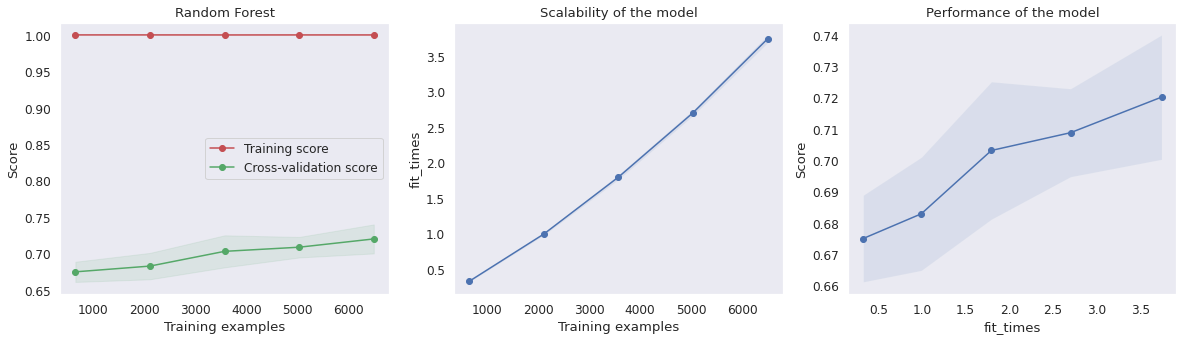

In [ ]:
another_plot_learning_curve(rf, "Random Forest", X_train, y_train, cv = kfold_rf)

### 4.3.1 Hyperparameter Tuning

In [ ]:
import optuna
from sklearn.metrics import auc, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 50)
    max_features = trial.suggest_int("max_features" , 1, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 50)
    rf_opt = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, 
                                    max_features = max_features, min_samples_leaf = min_samples_leaf)
    rf_opt.fit(X_train, y_train)
    y_pred_opt = rf_opt.predict(X_val)
    return roc_auc_score(y_pred_opt, y_val)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2021-02-25 02:55:34,379] A new study created in memory with name: no-name-940cfbe7-cff6-4f15-b6c8-e2545b3f7a6c
[I 2021-02-25 02:56:25,950] Trial 0 finished with value: 0.6638235013818736 and parameters: {'n_estimators': 529, 'max_depth': 32, 'max_features': 16, 'min_samples_leaf': 37}. Best is trial 0 with value: 0.6638235013818736.
[I 2021-02-25 02:56:34,050] Trial 1 finished with value: 0.6818993506493507 and parameters: {'n_estimators': 553, 'max_depth': 42, 'max_features': 2, 'min_samples_leaf': 40}. Best is trial 1 with value: 0.6818993506493507.
[I 2021-02-25 02:56:47,599] Trial 2 finished with value: 0.6597347799879446 and parameters: {'n_estimators': 327, 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 11}. Best is trial 1 with value: 0.6818993506493507.
[I 2021-02-25 02:57:29,793] Trial 3 finished with value: 0.653254250823545 and parameters: {'n_estimators': 955, 'max_depth': 44, 'max_features': 6, 'min_samples_leaf': 22}. Best is trial 1 with value: 0.681899350649

Trial 1 finished with value: 0.6921997755331089 and parameters: {'n_estimators': 828, 'max_depth': 17, 'max_features': 12, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.6921997755331089.

Trial 1 finished with value: 0.6818993506493507 and parameters: {'n_estimators': 553, 'max_depth': 42, 'max_features': 2, 'min_samples_leaf': 40}. Best is trial 1 with value: 0.6818993506493507.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import auc, roc_auc_score, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.3, random_state=0)
kfold_rf_opt_final = KFold(n_splits=10, shuffle=True, random_state=1234)
rf_opt_final = RandomForestClassifier(n_estimators = 553,  max_depth = 42, max_features = 2, min_samples_leaf = 40)
rf_opt_final.fit(X_train, y_train)
accuracies = cross_val_score(estimator = rf_opt_final, X = X_train, y = y_train, cv = kfold_rf_opt_final)
Accuracy = accuracies.mean()
Standard_Deviation = accuracies.std()
cm_rf_opt_final = confusion_matrix(y_val, rf_opt_final.predict(X_val))
score_rf_opt_final = roc_auc_score(y_val, rf_opt_final.predict(X_val))
print(cm_rf_opt_final)
print(score_rf_opt_final)

[[2085    3]
 [ 999    9]]
0.503745894909688


[[1973  115]
 [ 822  186]]
0.5647235905856596 n = 828 max = 17 features = 12 min = 4 (Treat Imbalance)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

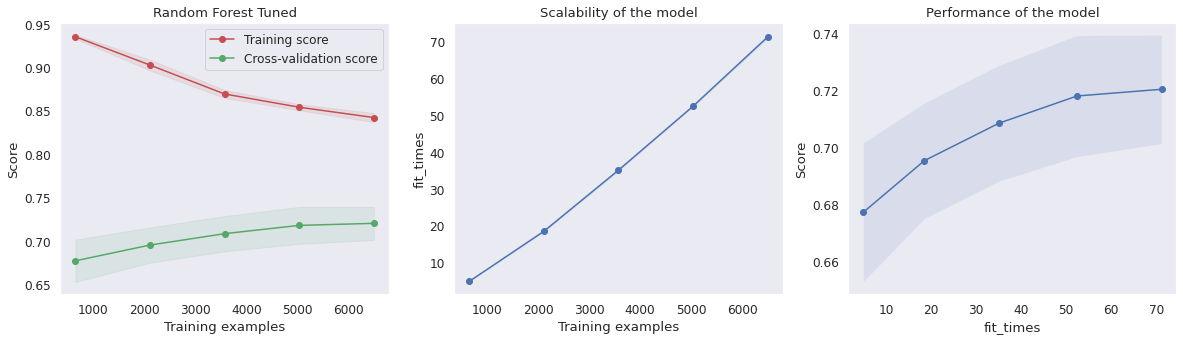

In [ ]:
another_plot_learning_curve(rf_opt_final, "Random Forest Tuned", X_train, y_train, cv = kfold_rf_opt_final)

## 4.3.2 Submission

In [ ]:
yhat_rf = rf_opt_final.predict_proba(test)[:,1]
ide = sample['index']
submission_rf = pd.Series(yhat_rf, name = 'Best Performance')
submission_rf = pd.concat([ide, submission_rf], axis = 1).reset_index(drop = True)
submission_rf.head()

,index,Best Performance
0,0,0.229658
1,1,0.260909
2,2,0.221209
3,3,0.270392
4,4,0.233343


In [ ]:
submission_rf.to_csv("Submission_Random Forest Tuned_MMH.csv", index = False)

## AdaBoost Bagging

In [ ]:
'''from sklearn.ensemble import BaggingClassifier
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
bbc = BaggingClassifier(base_estimator = AdaBoostClassifier(n_estimators = 991, learning_rate = 0.30233947724431515)
smotetomek = SMOTETomek(random_state=42)
pipe = Pipeline([('smotetomek', smotetomek),('bbc', bbc)])
score_pipe = cross_val_score(pipe, train, y, scoring = 'roc_auc', n_jobs = -1, cv = cv)
print(score_pipe)'''

[0.49919773 0.48063712 0.50980801 0.51189495 0.4949661  0.48918662
 0.5011527  0.51839682 0.48738191 0.48436478 0.50705982 0.5169277
 0.49985741 0.50250691 0.48250951]


In [ ]:
score_pipe.mean()

0.49905653853785886

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

bbc = BaggingClassifier(base_estimator = AdaBoostClassifier(), random_state = 0)
bbc.fit(X_train, y_train)
ypred_bbc = bbc.predict(X_val)
score_bbc = roc_auc_score(ypred_bbc, y_val)
print(score_bbc)

0.5957722604447103


[[2869  474]
 [   2    1]] 0.59577 (Imbalance not treated)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

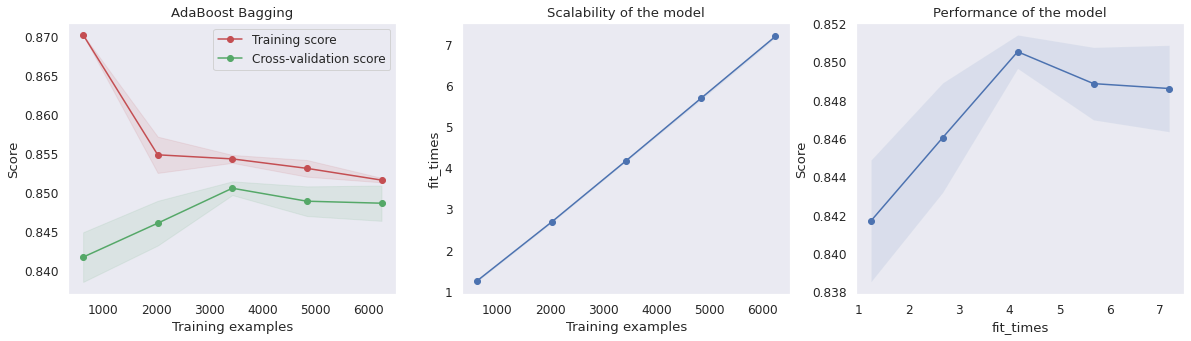

In [ ]:
another_plot_learning_curve(bbc, "AdaBoost Bagging", X_train, y_train)

## Submission

In [ ]:
yhat_bbc = bbc.predict(test)
ide = sample['index']
submission_bbc = pd.Series(yhat_bbc, name = 'Best Performance')
submission_bbc = pd.concat([ide, submission_bbc], axis = 1).reset_index(drop = True)
submission_bbc.head()

,index,Best Performance
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [ ]:
submission_bbc.to_csv('AdaBoost Bagging_MMH.csv', index = False)

In [ ]:
submission_bbc['Best Performance'].value_counts()

0.0    5997
1.0       3
Name: Best Performance, dtype: int64

## RF bagging

In [ ]:
import optuna
from sklearn.metrics import auc, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1, 1000)
    #criterion = trial.suggest_categorical("criterion", ['gini','entropy'])
    max_depth = trial.suggest_int("max_depth", 1, 50)
    max_features = trial.suggest_int("max_features" , 1, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 50)
    #min_samples_split = trial.suggest_float("min_samples_split", 0.01, 0.7)
    rf_opt = RandomForestClassifier(n_estimators = n_estimators,
                                    min_samples_leaf = min_samples_leaf, 
                                    max_depth = max_depth, 
                                    max_features = max_features)
    scores = cross_val_score(rf_opt, train, y, n_jobs = -1, scoring = 'roc_auc')
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2021-02-25 11:24:46,695] A new study created in memory with name: no-name-79ccde1f-d9ef-4cb2-9879-f67bf5d9af4d
[I 2021-02-25 11:27:24,870] Trial 0 finished with value: 0.5181992660031967 and parameters: {'n_estimators': 718, 'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 33}. Best is trial 0 with value: 0.5181992660031967.
[I 2021-02-25 11:29:21,687] Trial 1 finished with value: 0.5181499801203284 and parameters: {'n_estimators': 845, 'max_depth': 21, 'max_features': 4, 'min_samples_leaf': 27}. Best is trial 0 with value: 0.5181992660031967.
[I 2021-02-25 11:30:32,659] Trial 2 finished with value: 0.5087519199150136 and parameters: {'n_estimators': 516, 'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 42}. Best is trial 0 with value: 0.5181992660031967.
[I 2021-02-25 11:33:19,689] Trial 3 finished with value: 0.5163579232181249 and parameters: {'n_estimators': 646, 'max_depth': 18, 'max_features': 9, 'min_samples_leaf': 42}. Best is trial 0 with value: 0.5181992660031

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

cv = KFold(n_splits=10, shuffle=True, random_state=1234)
rfbbc = BaggingClassifier(base_estimator = RandomForestClassifier(n_estimators = 718,
                                                                  max_depth = 20,
                                                                  max_features = 7,
                                                                  min_samples_leaf = 33), 
                          random_state = 0)
score_rfbbc = cross_val_score(rfbbc, train, y, n_jobs = -1, cv = cv, scoring = 'roc_auc')
print(score_rfbbc.mean)
print(confusion_matrix(ypred_rfbbc, y_val))

<built-in method mean of numpy.ndarray object at 0x7f2df72b4d00>
[[2788  456]
 [  83   19]]


In [ ]:
score_rfbbc.mean()

0.5153625564924103

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

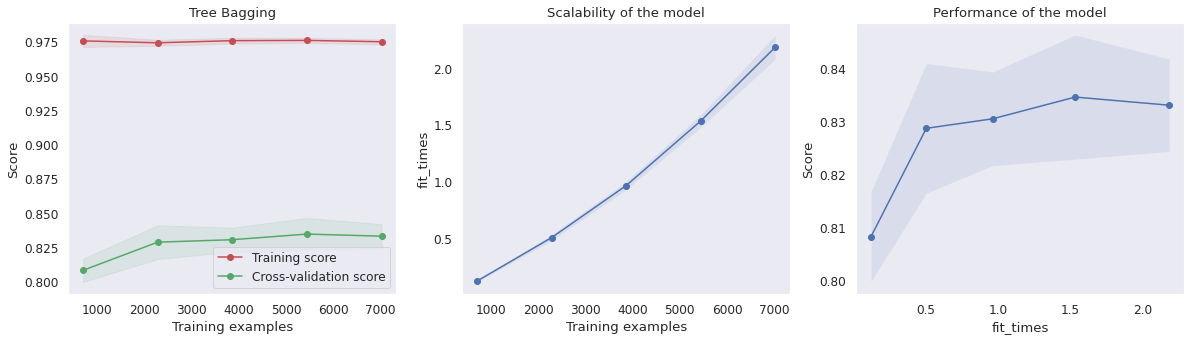

In [ ]:
another_plot_learning_curve(rfbbc, "Tree Bagging", X_train, y_train, cv = cv)

In [ ]:
y_train.value_counts()

0.0    6645
1.0    1162
Name: Best Performance, dtype: int64